# __Naive Bayes Classifier__ - __Spam Filtering__

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,type,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.shape

(5572, 2)

In [9]:
df.isnull().sum()

type     0
email    0
dtype: int64

In [10]:
X = df.email
y = df.type

# TF-IDF on our data

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

X_tfidf = tfidf.fit_transform(X)

In [17]:
tfidf.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084

In [18]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: email, dtype: object

In [19]:
# Vectorized representation of our X dataset
X_tfidf.toarray()[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Train test split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, random_state=47, test_size=0.2)

# Now we train the NB classififer

In [21]:
from sklearn.naive_bayes import BernoulliNB

In [22]:
model = BernoulliNB()

In [23]:
model.fit(X_train, y_train)

BernoulliNB()

In [24]:
y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)

In [25]:
from sklearn.metrics import accuracy_score, classification_report

In [26]:
print('train: ', accuracy_score(y_train, y_predict_train))
print('test: ', accuracy_score(y_test, y_predict_test))

train:  0.989230424052053
test:  0.9730941704035875


In [27]:
pd.crosstab(y_test, y_predict_test)

col_0,ham,spam
type,,
ham,971,4
spam,26,114


In [28]:
import seaborn as sns

<AxesSubplot:xlabel='col_0', ylabel='type'>

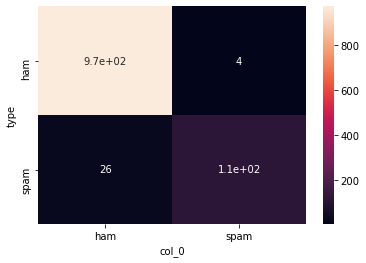

In [30]:
sns.heatmap(pd.crosstab(y_test, y_predict_test), annot=True)

In [31]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       975
        spam       0.97      0.81      0.88       140

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115

